# 💡OpenCV를 사용하여 스마트폰 카메라 접근하기
---
스마트폰 카메라 앱을 DAQ로 사용하기 위해 카메라 앱에 접근하는 코드를 정리합니다.
* DAQ로 사용할 스마트폰이 코드를 실행하는 컴퓨터(서버)와 같은 네트워크에 연결되어 있어야 합니다.
* 컴퓨터에 웹캠이 설치되어 있는 경우, 스마트폰과 컴퓨터를 케이블로 연결해야 합니다.
* 파이썬 스크립트인 .py가 아인 .ipynb 파일에서는 esc를 눌렀을 때 창이 정상적으로 닫히지 않을 수 있다.

### 카메라에 접근하여 화면 띄우기
OpenCV 라이브러리를 사용하여 스마트폰 카메라로 촬영되는 영상을 컴퓨터(서버)에 띄우는 메서드입니다.

In [ ]:
# openCV 라이브러리 불러오기
import cv2

# 웹캠 영상을 캡처하고 화면에 표시하는 함수 정의
def show_video():
    # VideoCapture 객체 생성 - 0은 기본 카메라를 의미
    cap = cv2.VideoCapture(0)

    # 프레임 가로 크기 지정
    cap.set(3, 960)
    # 프레임 세로 크기 지정
    cap.set(4, 640)

    # 카메라로부터 프레임을 읽어오기
    ret, frame = cap.read()
    
    if not ret:
        # 프레임 읽기 실패
        print("Error: Failed to capture frame")
    else:
        # 종료될 때까지 계속해서 프레임 읽기
        while True:
            ret, frame = cap.read()
            # video라는 이름의 창에 프레임 출력
            cv2.imshow('video', frame)

            # 입력되는 키를 k변수에 저장 - 1초마다 사용자 입력을 기다림
            k = cv2.waitKey(1) & 0xff1
            if k == 27: # 27은 esc키 번호
                # esc 키가 눌리면 프레임 읽기 종료
                break
        
        # VideoCapture 객체 소멸
        cap.release()
        # 창 닫기
        cv2.destroyAllWindows()

# show_video 함수 호출
show_video()

코드 실행 예시
* CCTV 역할의 스마트폰
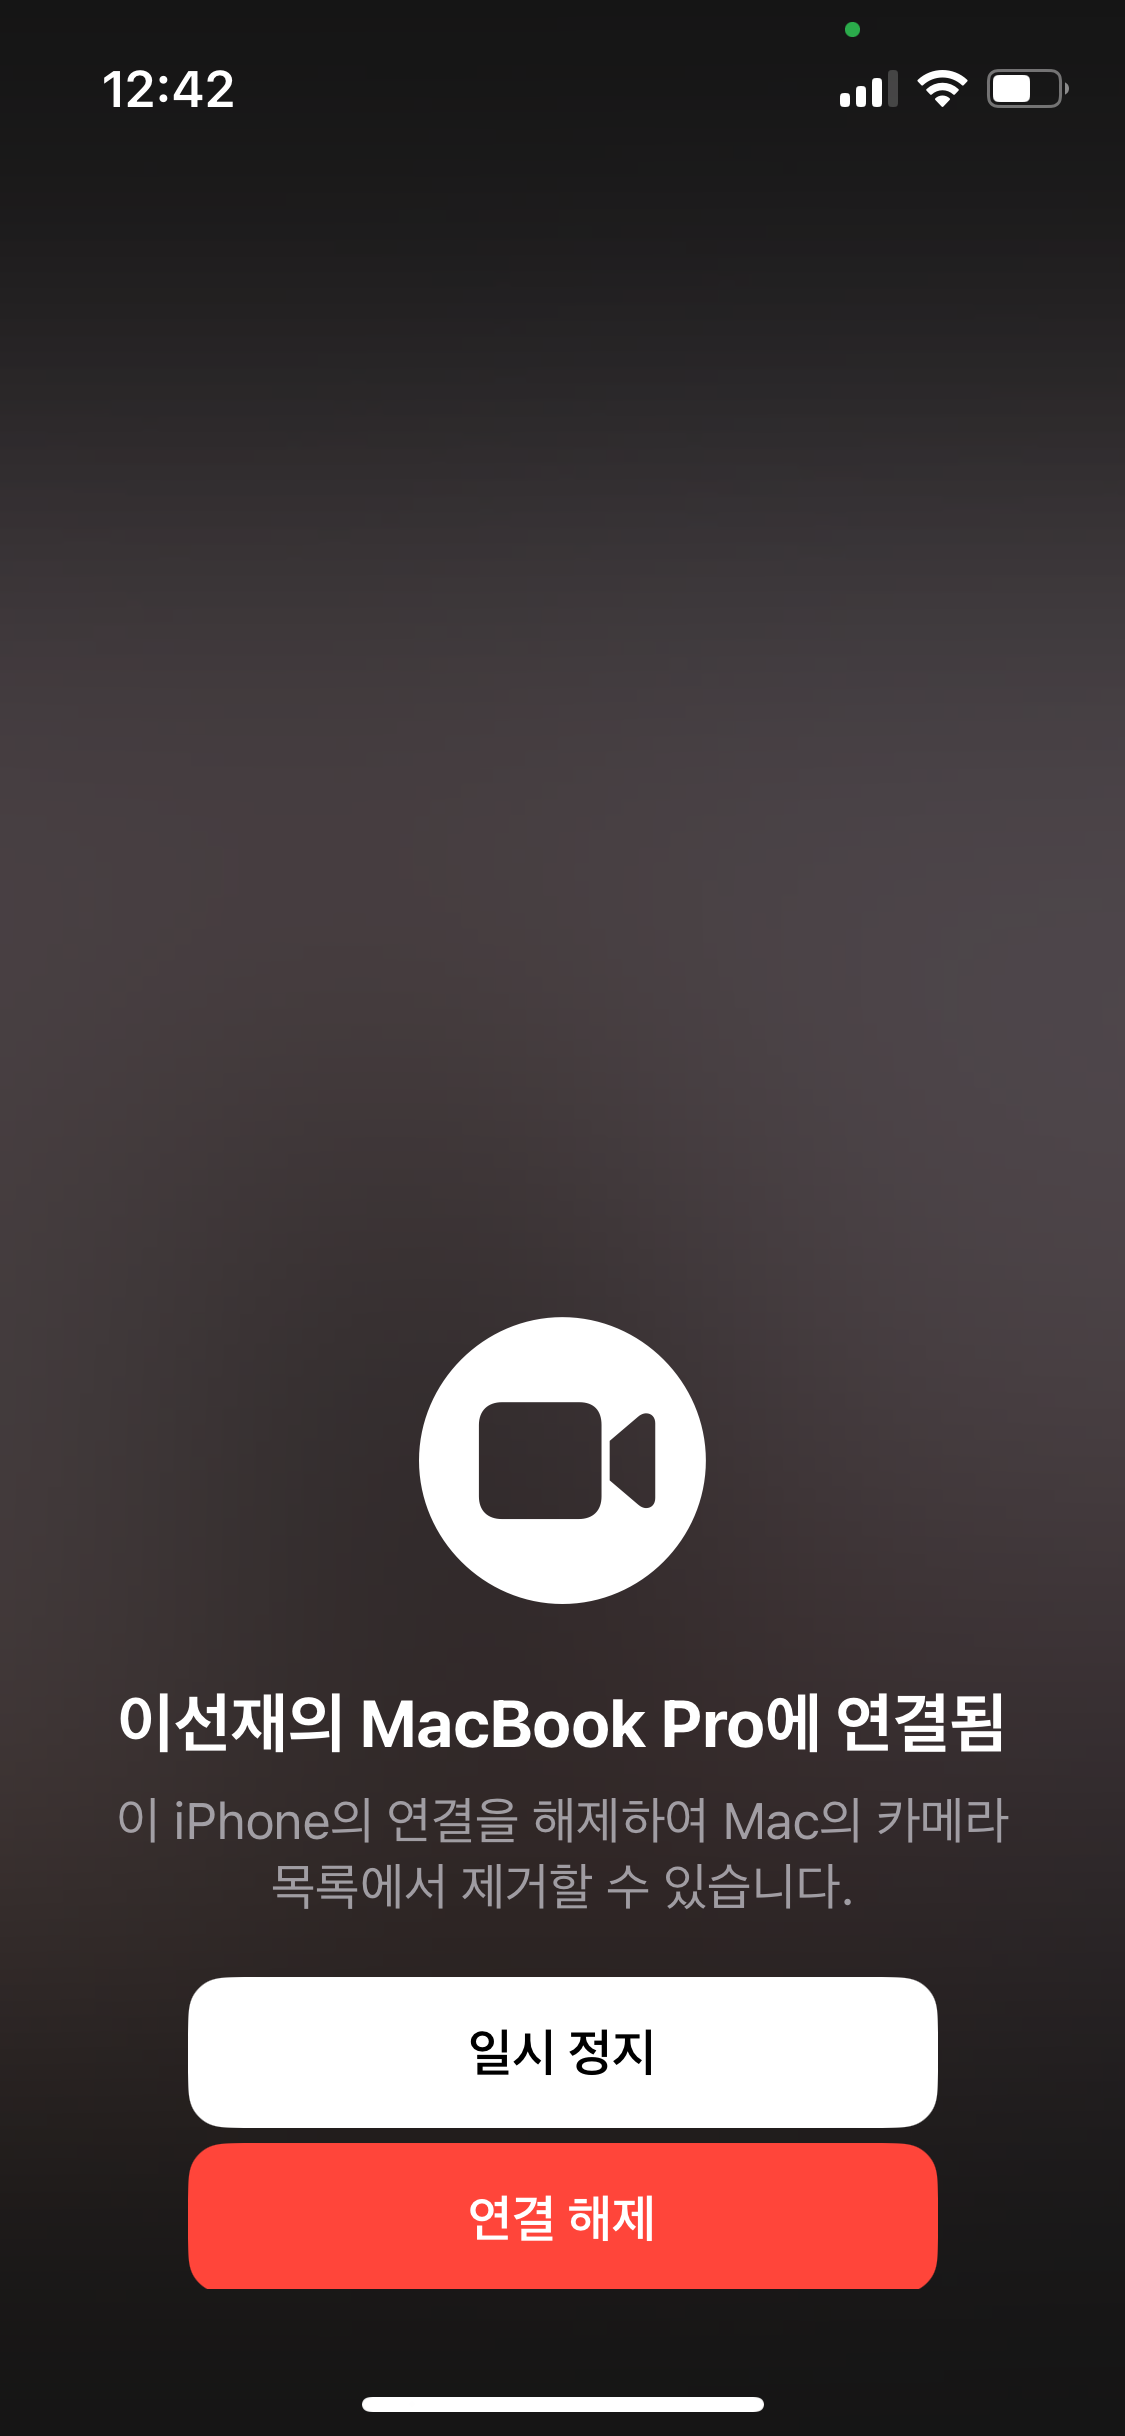
* 전송되는 영상 확인
![screen%28server%29.PNG](./screen%28server%29.PNG)

### 카메라로 촬영한 영상 저장하기
OpenCV 라이브러리를 사용하여 스마트폰 카메라로 촬영되는 영상을 컴퓨터(서버)에 저장하는 메서드입니다.

In [1]:
# openCV 라이브러리 불러오기
import cv2

# 웹캠 영상을 캡처하고 영상 데이터로 저장하는 함수 정의
def write_video():
    # VideoCapture 객체 생성 - 0은 기본 카메라를 의미
    cap = cv2.VideoCapture(0)

    # 프레임 가로 크기 지정
    cap.set(3, 960)
    # 프레임 세로 크기 지정
    cap.set(4, 480)

    # 초당 프레임 수 설정
    fps = 20
    
    # 저장되는 영상의 가로 크기를 프레임의 가로 크기로 지정
    width = int(cap.get(3))
    # 저장되는 영상의 세로 크기를 프레임의 세로 크기로 지정
    height = int(cap.get(4))
    # MP4 코덱인 DIVX로 FourCC 코드 설정
    fcc = cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')

    # VideoWriter 객체 생성 - 영상 저장 경로 설정
    out = cv2.VideoWriter('./video/DIVX.mp4', fcc, fps, (width, height))

    # 카메라로부터 프레임 읽어오기
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to capture frame")
    else:
        while True:
            ret, frame = cap.read()

            # divx라는 이름의 창에 프레임 출력
            cv2.imshow('divx', frame)

            # 입력되는 키를 k변수에 저장 - 1초마다 사용자 입력을 기다림
            k = cv2.waitKey(1) & 0xff # 27은 esc키 번호
            if k == 27:
                # esc 키가 눌리면 프레임 읽기 종료
                break

            
        # VideoCapture 객체 소멸
        cap.release()
        # VideoWriter 객체 소멸
        out.release()
        # 창 닫기
        cv2.destroyAllWindows()


# write_video 함수 호출            
write_video()

2024-02-25 01:57:33.175 python[28400:28076901] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.
OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


* 저장된 비디오 확인
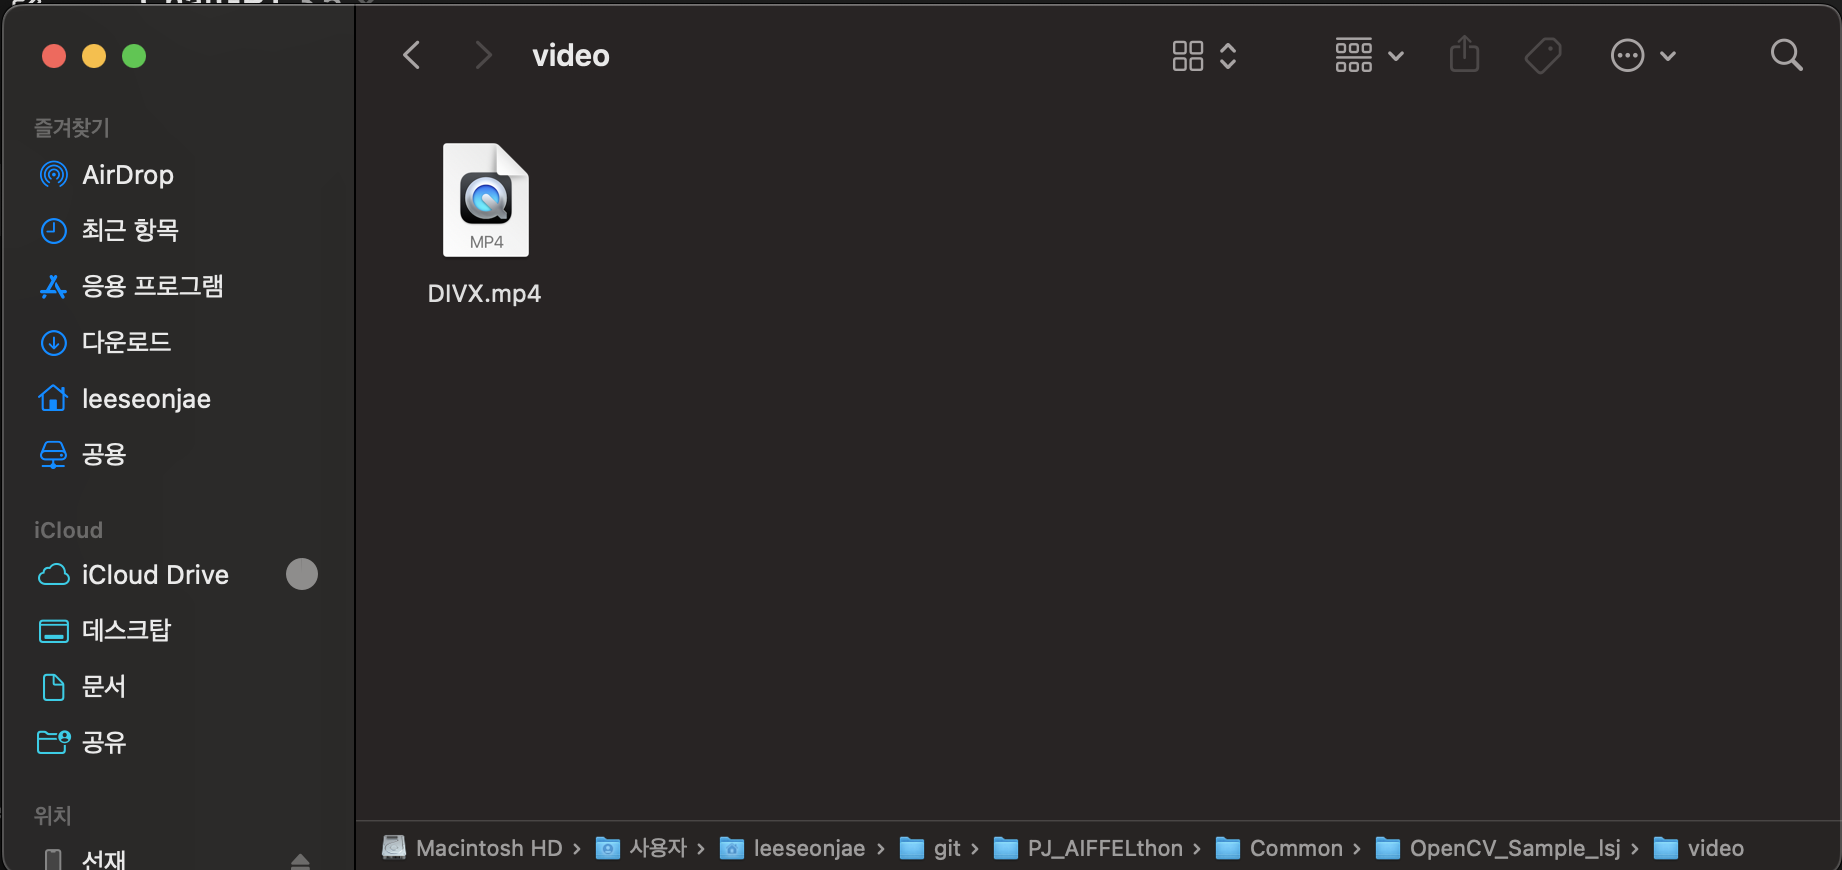